  **NAMA : RIZZI ALPADISTA**

  **NIM : 20230040045**

  **KELAS : TI23E**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_excel('/content/100 Ulasan dan Sentiment.xlsx')

In [ ]:
print(df.head())

                                             Ulasan  Sentiment
0  Aplikasi ini sangat membantu belanja kebutuhan...  positive
1      Sering error saat checkout, tolong diperbaiki  negative
2  Fitur pesan hotel sangat lengkap dan mudah dip...  positive
3                 Banyak promo menarik, suka banget!  positive
4          Loading aplikasi lama sekali, bikin kesal  negative


In [ ]:
df.columns = ['review', 'sentiment']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    df['review'], df['sentiment'], test_size=0.2, random_state=42, stratify=df['sentiment'])

In [ ]:
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [ ]:
model = MultinomialNB()
model.fit(X_train_vec, y_train)

MultinomialNB()

In [ ]:
y_pred = model.predict(X_test_vec)
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred, labels=['positive', 'negative'])
report = classification_report(y_test, y_pred)

print("Akurasi:", accuracy)
print("\nClassification Report:\n", report)

Akurasi: 0.9

Classification Report:
               precision    recall  f1-score   support

    negative       1.00      0.75      0.86         8
    positive       0.86      1.00      0.92        12

    accuracy                           0.90        20
   macro avg       0.93      0.88      0.89        20
weighted avg       0.91      0.90      0.90        20



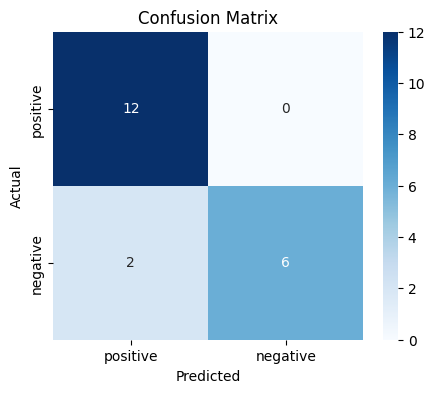

In [ ]:
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['positive', 'negative'],
            yticklabels=['positive', 'negative'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

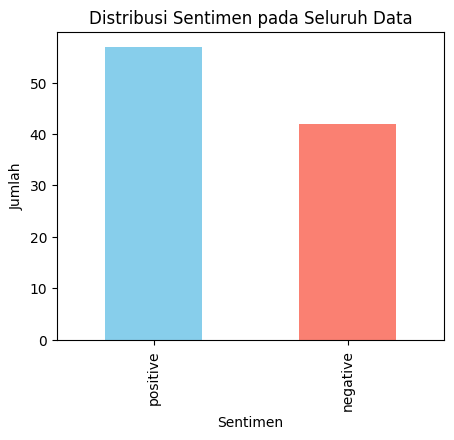

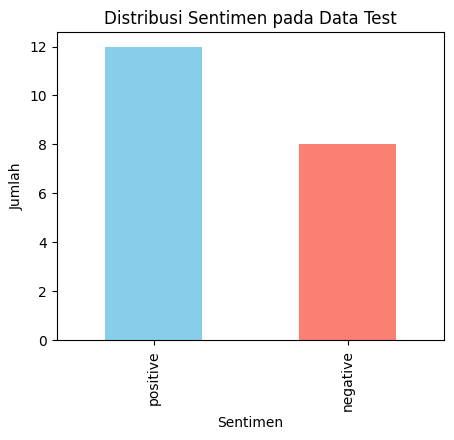

In [ ]:
plt.figure(figsize=(5,4))
df['sentiment'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribusi Sentimen pada Seluruh Data')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.show()

# Untuk data test saja
plt.figure(figsize=(5,4))
y_test.value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribusi Sentimen pada Data Test')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.show()

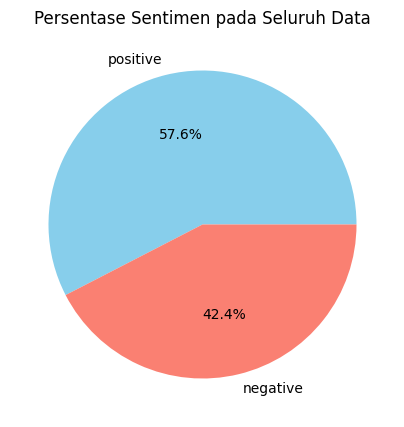

In [ ]:
plt.figure(figsize=(5,5))
df['sentiment'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'salmon'])
plt.title('Persentase Sentimen pada Seluruh Data')
plt.ylabel('')
plt.show()